# GWP2 analysis and python code

# 1. Multicollinearity

## 1.1 Definition:
Multicollinearity refers to a situation in which two or more independent variables in a regression model are highly correlated, making it difficult to isolate the individual effect of each variable on the dependent variable. We can also express it as a typical regression model, two or more explanatory variables that have a high degree of correlation with one another occur.Mathematically, it is expressed by a high correlation coefficient between independent variables.  This statistical phenomenon is known as multicollinearity. Highly correlated variables have a strong linear relationship between two or more explanatory variables, which can result in indeterminate regression coefficients with infinite standard errors, particularly in the case of perfect multicollinearity (Wooldridge, 2019) for a regression model in which the explanatory variables exhibit perfect correlation.

## 1.2 Description:
Multicollinearity is the term used to describe the situation in a regression model when one predictor appears to have a significant influence on the outcome, but in actuality, the change in the regression model may be driven by another closely related predictor. Accurately interpreting the data and deriving significant inferences from the regression model are hampered by multicollinearity. It is challenging to appropriately interpret the data and derive significant inferences from the regression model in the presence of multicollinearity.

## 1.3 Demonstration:
 We create simulated student data on how the amount of time spent studying or watching Television affects exam scores in order to highlight the multicollinearity issue. We introduce a random noise to the study and TV watching hours in the simulated data. The regression findings below demonstrate how multicollinearity can cause coefficients to deviate from predicted signs and p-values to be inflated, which would imply a decrease in statistical significance. The model finds it challenging to reliably predict each of their individual effects due to the multicollinearity issue. This may result in erratic coefficient estimations and make it challenging to determine the relative importance of each variable.

## 1.4 Diagram:
The correlation between the amount of time spent studying and watching TV, as determined by the regression model in section 1.3, is depicted in the diagram below. We discover that there is a strong, linear correlation between the amount of time spent studying and watching TV; for the purpose of accuracy, this correlation is set at 0.94498. The matrix of correlations between the explanatory variables can be seen below.



In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Generating Data and creating dataframe
np.random.seed(0)
hoursStudied = np.random.randint(0, 20, 200)
hoursTv = hoursStudied + np.random.normal(0, 2, 200)
exam_score = 2 * hoursStudied + 3 * hoursTv + np.random.normal(0, 2, 200)
data = pd.DataFrame({'HoursStudied': hoursStudied, 'HoursTV': hoursTv, 'ExamScore': exam_score})

In [3]:
X = data[['HoursStudied', 'HoursTV']]
X = sm.add_constant(X)
y = data['ExamScore']
model = sm.OLS(y, X).fit()

In [4]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              ExamScore   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.159e+04
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          1.73e-231
Time:                        20:15:38   Log-Likelihood:                -428.77
No. Observations:                 200   AIC:                             863.5
Df Residuals:                     197   BIC:                             873.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.2748      0.270     -1.019   

In [5]:
correlation_matrix = np.corrcoef(hoursStudied, hoursTv)
print(correlation_matrix)

[[1.         0.94498094]
 [0.94498094 1.        ]]


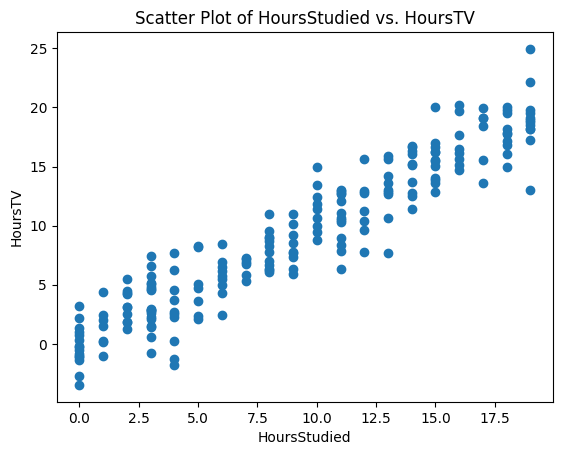

In [6]:
## Plotting the sample data
plt.scatter(hoursStudied, hoursTv)
plt.xlabel('HoursStudied')
plt.ylabel('HoursTV')
plt.title('Scatter Plot of HoursStudied vs. HoursTV')
plt.show()

## 1.5 Diagnosis:
The following techniques can be used to diagnose multicollinearity (Gujarati, 2018):

(I) Correlation Matrix Multicollinearity can be identified by calculating the correlation coefficients between each pair of independent variables, just as we did in section 1.4. A correlation coefficient that is near to +1 or -1 denotes a robust linear association and implies the presence of multicollinearity.

(ii) Tolerance/Variance Inflation Factor (VIF): VIF illustrates how multicollinearity causes an estimator's variance to increase. A high level of multicollinearity is indicated by a VIF value larger than 5 or 10. Conversely, tolerance denotes the proportion of variance and is the reciprocal of VIF. A tolerance value of less than 0.2 or 0.1 indicates high multicollinearity.

(iii) Visual examination: If the explanatory variables can show collinearity visually, plotting the scatterplots or heatmaps can be done, just as we did in section 1.4. It indicates multicollinearity if you see a linear pattern or point clustering.

(iv) Eigenvalues Analysis: The function of the correlation matrix can also be duplicated using the eigenvalues analysis. In doing so, multicollinearity is indicated if one or more eigenvalues are negligibly small or close to zero.

## 1.6 Damage:
 Regression analysis interpretation may be impacted by multicollinearity. Some of the effects of multicollinearity are listed below (Brooks, 2019):

 (i) Interpreting variable effects is difficult or yields unreliable coefficient estimates: Regression models that have highly correlated regressors find it challenging to isolate the unique impacts of each variable, which leads to significant fluctuations in the coefficient estimates and renders the model unreliable. As such, coefficients may exhibit unexpected signs or magnitudes, which complicates the process of figuring out how each variable actually affects the dependent variable.

 (ii) Losing accuracy and efficiency as well as distorting statistical significance: Wider confidence intervals that result from multicollinearity can distort the standard errors of coefficient estimates, which lowers the accuracy and effectiveness of the estimates.

 (iii) Inaccurate variable importance: Multicollinearity has the potential to confuse one variable's significance for another. This is due to the fact that highly correlated variables would confuse the effect of the variable with its actual impact on the outcome variable due to their similar effects on the variable.

## 1.7 Directions:
According to Ramsey & Schafer (2013) and James, Witten, Hastie & Tibshirani (2013), there are multiple approaches to solving the multicollinearity problem.

 (i) The process of variable selection involves most modelers attempting to eliminate one or more highly correlated variables from a regression model by applying theoretical knowledge or apriori expectations. Finding out which variable in a regression model is more significant can be accomplished by investigating stepwise regression.

 (ii) The "micronumerosity" problem is addressed: Since multicollinearity is regarded as a small sample problem, this is effectively gathering more data to increase the sample size. Consequently, increasing the number of observations can help lessen the effect of multicollinearity on the coefficient estimates.

 (iii) Centering and transformation of variables: The distributions of logarithmic, square root, and reciprocal transformations can help minimize correlation between the variables when we apply these transformations. Reducing multicollinearity can occasionally be achieved by centering the variables and subtracting the mean. By doing so, it may be possible to reduce multicollinearity by providing the emerging variable with various scales.

(iv) Applying machine learning regularization techniques: The multicollinearity issue can be solved through machine learning techniques; the ridge and LASSO approaches, for example, are well-liked for doing so. For example, the LASSO adds a penalty term that aids in choosing explanatory variables or promotes coefficient shrinkage.

 (v) In order to create composite variables that represent the shared information, it is common practice to combine the uncorrelated components of highly correlated variables using analytical techniques and partial correlations. Principal Component Analysis (PCA) and factor analysis are two examples of such techniques. Similarly, we can compute partial correlations to evaluate the relationship between variables while controlling for other variables, rather than depending only on correlation coefficients. This aids in resolving the multicollinearity issue.



In [7]:
#%matplotlib inline
from datetime import date, timedelta
import yfinance as yf
import matplotlib.dates as mdates
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid")

# 2. Unit Root Testing
2.1 Definition:
	In statistical analysis, unit root testing assesses whether the characteristic equation of a time series includes any root equal to one. The existence of a unit root signals non-stationary behavior in the time series.

2.2 Description:
	Two commonly used unit root testings are Augmented Dickey–Fuller (ADF) test and Phillips–Perron (PP) test:
	For both tests, the null hypothesis is that the time series has a unit root and is non-stationary. The ADF test involves estimating an autoregressive model and testing the significance of the coefficient on the lagged differenced variable. The PP test involves regressing the differenced series on lagged levels of the series and white noise. In both tests, if the calculated test statistic is smaller than the critical values, the null hypothesis of a unit root (non-stationarity) is rejected, suggesting stationarity.


## 2.3 Demonstration

We use real-world examples of the distribution of daily returns of cryptocurrencies like Dogecoin (DOGE_USD) and Bitcoin (BTC_USD) for the past 3 years from the Yahoo Finance website to demonstrate the result of adf test and kpss test.

In [8]:
def stock_Data(ls,start_date,end_date):
    data=pd.DataFrame()
    for i in ls:
        st=yf.download(i, start=start_date, end=end_date)["Adj Close"]
        st=st.reindex(st.index.strftime('%Y/%m/%d')).rename(i)
        data=pd.concat([data,st],axis=1)

    return data

In [9]:
# Define the stocks and the time period for which you want to pull data
stock = ["BTC-USD"]#,"DOGE-USD"]
end_date = date.today()
start_date = end_date - timedelta(days=365.25*3)

In [10]:
df=stock_Data(stock,start_date,end_date)
df.index = pd.to_datetime(df.index)
df["first_difference"] = df[["BTC-USD"]].diff()
df.head()

[*********************100%%**********************]  1 of 1 completed


,BTC-USD,first_difference
2020-12-12,18803.656250,NaN
2020-12-13,19142.382812,338.726562
2020-12-14,19246.644531,104.261719
2020-12-15,19417.076172,170.431641
2020-12-16,21310.597656,1893.521484


In [11]:
# ADF Test
result_adf = adfuller(df[["BTC-USD"]])
print("ADF Test for BTC-USD:")
print("ADF Statistic:", result_adf[0])
print("p-value:", result_adf[1])
# print("Critical Values:", result_adf[4])

# KPSS Test
result_kpss = kpss(df[["BTC-USD"]])
print("\nKPSS Test for BTC-USD::")
print("KPSS Statistic:", result_kpss[0])
print("p-value:", result_kpss[1])

# ADF Test
result_adf = adfuller(df.iloc[1:, -1])
print("\nADF Test for BTC-USD first difference:")
print("ADF Statistic:", result_adf[0])
print("p-value:", result_adf[1])

# KPSS Test
result_kpss = kpss(df.iloc[1:, -1])
print("\nKPSS Test for BTC-USD first difference::")
print("KPSS Statistic:", result_kpss[0])
print("p-value:", result_kpss[1])

ADF Test for BTC-USD:
ADF Statistic: -1.8978925728891785
p-value: 0.33305315952750303

KPSS Test for BTC-USD::
KPSS Statistic: 2.460846064021772
p-value: 0.01

ADF Test for BTC-USD first difference:
ADF Statistic: -33.92951377492831
p-value: 0.0

KPSS Test for BTC-USD first difference::
KPSS Statistic: 0.16236645715215187
p-value: 0.1


We pick alpha = 0.05 for our hypothesis testing.

- For original BTC-USD data, p-value of ADF (0.35) > alapha, and we fail to reject the null hypothesis that the BTC-USD time series has a unit root, suggesting that it may be non-stationary; p-value of KPSS (0.01) < 0.05 and we reject the null hypothesis that the BTC-USD time series is stationary around a deterministic trend, also evidence of non-stationarity.
- For first difference BTC-USD data, p-value of ADF test is extremely small (close to 0), leading to the rejection of the null hypothesis. This indicates that the first difference of the BTC-USD series is likely stationary. The p-value of KPSS (0.1) > 0.05 and we fail to reject the null hypothesis that the first difference of the BTC-USD series is stationary around a deterministic trend.

For both BTC-USD and its first difference, the results from ADF test and KPSS test are consistent.

## 2.4 Diagram
We can see from the diagram that BTC-USD price is clearly non-stationary, and its first difference is much closer to stationary, consistent with the result of unit root tests.

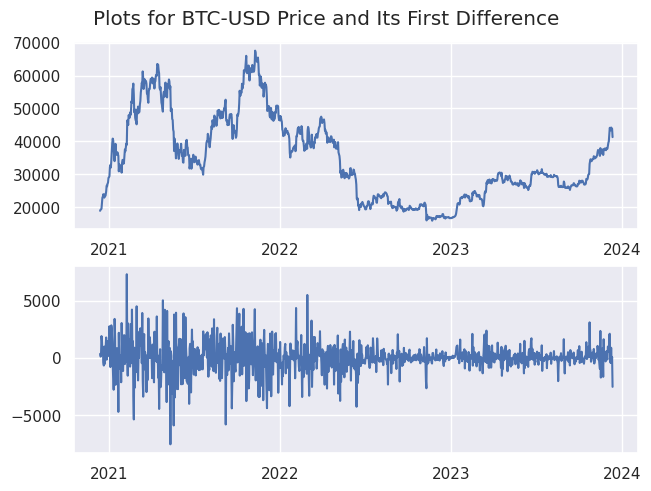

In [12]:
fig, ax = plt.subplots(2,1, layout="constrained")
ax[0].plot(df["BTC-USD"], label = "BTC-USD")
ax[1].plot(df["first_difference"], label = "First Difference")
fig.suptitle("Plots for BTC-USD Price and Its First Difference")
for axis in ax:
    axis.xaxis.set_major_locator(mdates.YearLocator())
    axis.xaxis.set_major_formatter(mdates.DateFormatter('%Y'));

# How two Challenges from Multicollinearity and Unit Root Testing can relate

Unit root testing and multicollinearity are two distinct problems, but in some situations they are similar (Gujarati, 2018; Brooks, 2019):
Firstly, the small sample size issue may be the cause of multicollinearity and unit root testing. Reduced power to detect a unit root and unreliable results can arise from small sample sizes. Because of the multicollinearity issue, it may also result in unstable coefficient estimates and broader confidence intervals. Consequently, expanding the sample size is akin to striking two birds with one stone—that is, solving the issues of multicollinearity and unit root testing.

Furthermore, the misspecification of the alternative hypothesis affects the multicollinearity and unit root testing issues. Different alternative hypotheses are used in different unit root tests. If the actual alternative hypothesis is different from the hypothesis that is put forth, it could affect the unit root test's reliability. Similar to this, inaccurately defining the alternative hypothesis that there is no multicollinearity in multicollinearity testing can lead to erroneous findings.

Omitted structural breaks have an impact on multicollinearity issues and unit root testing. Since unit root testing requires a continuous, reliable data generation process, it may be susceptible to structural failures or regime changes. If such breaks exist and are ignored, it could have an impact on the results of the unit root test. Similarly, when testing for multicollinearity, structural breaks in the correlation patterns between variables may have an impact on the presence or degree of multicollinearity. Thus, integrating structural breaks into the unit root analysis and multicollinearity problem solving is one method of tackling this frequent difficulty.
Nonlinear dependencies also have an impact on multicollinearity issues and unit root testing: Unit root tests presuppose linear dependencies and are based on linear models. In case the underlying relationship is nonlinear, unit root testing might not be suitable and might lead to false positives.

Multicollinearity testing, like the example above, assumes linear correlations between variables; therefore, it might not fully capture the underlying multicollinearity in the data if nonlinear dependencies are present. Since most modelers focus on addressing the non-linearities, this problem can be easily solved by assuming that the multicollinearity and unit root testing issues are based on linear dependencies. Furthermore, unit root testing and multicollinearity testing may benefit from data transformations. Differentiating the time series data can be helpful in identifying the existence of a unit root. In multicollinearity testing, transforming variables (such as taking logarithms) may help decrease multicollinearity and decrease correlation.

In addition, there are problems with data snooping and multiple testing, which impact multicollinearity and unit root testing. When multiple unit root or multicollinearity tests are performed on the same set of data, the likelihood of finding false correlations by chance increases. To solve this issue, correction strategies, significance threshold adjustments, and multiple testing must be taken into account.

In conclusion, even though multicollinearity and unit root testing are two distinct problems, resolving them calls for careful consideration of the appropriate model specifications, sample sizes, data transformations, and testing issues. It is crucial to investigate each problem independently and employ the proper methodologies in order to produce results that are reliable and valid.




# 3. Joining Time Series with Different Frequencies

## 3.1 Definition:
 Combining several time series datasets with varying observational frequencies or intervals is known as joining time series with different frequencies. The procedure comprises combining the observations from the different datasets into a single, unified dataset by aligning their timestamps. The fields of time series analysis and data manipulation have talked a lot about this subject (McKinney, 2017).

 ## 3.2 Description:
 Combining or aligning several time series with different time intervals or frequencies is referred to as "joining time series with different frequencies." This is frequently required when working with data at various levels of granularity or when analyzing data from various sources. It is feasible to conduct insightful analyses and extract knowledge from the combined data by aligning the time series (Brockwell & Davis, 2016, pp. 123-145).

 ## 3.3 Demonstration:
 To illustrate the concept of joining time series with different frequencies, let's consider a practical scenario. Imagine we have two datasets: one contains monthly sales data for a product, and the other contains daily advertising expenditure data. Our objective is to merge these datasets to investigate the relationship between advertising spending and monthly sales. To demonstrate this, we will use simulated data. We create two datasets: one representing monthly sales and the other representing daily advertising expenditures. The monthly sales dataset contains the total sales for each month, while the daily advertising dataset includes the advertising expenses for each day.



In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Set the random seed to ensure reproducibility
random.seed(42)

# Simulated monthly sales data
monthly_sales = pd.DataFrame({
    'Month': pd.date_range(start='2019-01-01', periods=12, freq='M'),
    'Sales': np.random.randint(1000, 5000, size=12)
})

# Simulated daily advertising expenditures data
daily_advertising = pd.DataFrame({
    'Date': pd.date_range(start='2019-01-01', periods=365, freq='D'),
    'Expenditure': np.random.randint(100, 1000, size=365)
})

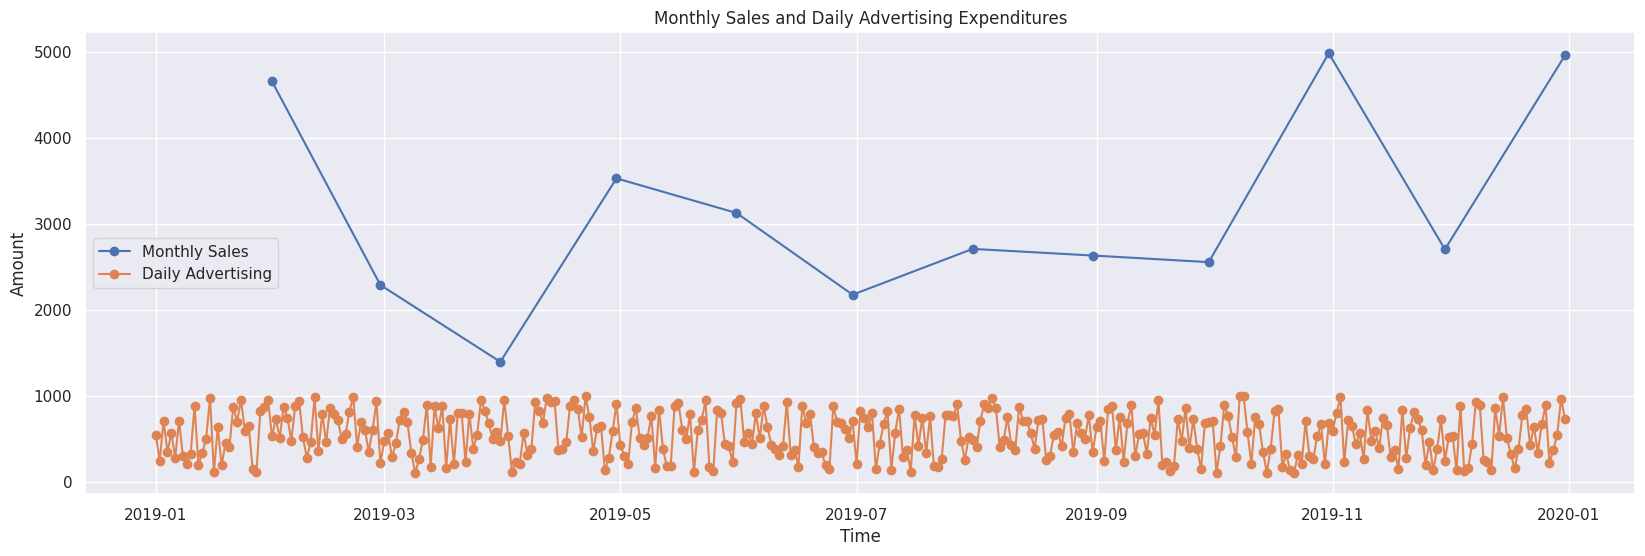

In [16]:
# Plotting monthly sales and daily advertising expenditures
plt.figure(figsize=(20, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o', label='Monthly Sales')
plt.plot(daily_advertising['Date'], daily_advertising['Expenditure'], marker='o', label='Daily Advertising')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Monthly Sales and Daily Advertising Expenditures')
plt.legend()
plt.grid(True)
plt.show()

## 3.5 Diagnosis:
We can look over the data and see if there are any differences in the frequencies or time intervals to determine the difficulty of combining time series with different frequencies. There may be distinct frequencies in the time series if the timestamps of the data show inconsistent granularities or are out of alignment (Hyndman & Athanasopoulos, 2018, pp. 76-92).

## 3.6 Damage:
There are a number of problems that can arise when joining time series with different frequencies. First of all, since the timestamps do not align precisely, combining time series with different frequencies may result in missing or duplicated data points. Second, the various frequencies may affect the analysis's accuracy because the data's granularity might not be sufficient to identify the desired relationships or patterns. Finally, because the irregularity in the data may upset the underlying assumptions or structure of the selected models, it can make forecasting or modeling efforts more difficult (Brockwell & Davis, 2016, pp. 123-145).

## 3.7 Directions:
Several strategies can be taken into consideration to overcome the difficulty of combining time series with different frequencies: Resampling: Resampling is the process of changing the frequency of time series data. Upsampling or downsampling the data can be used to accomplish this. Upsampling involves increasing the frequency. It is possible to align the timestamps and modify the granularity of the data by using techniques like interpolation or aggregation (Tsay, 2014). Rolling Window Analysis: This method can be used if the frequencies are not able to be aligned directly. With this method, appropriate-sized overlapping windows are created, and within each window, calculations or analyses are carried out. Despite the variations in frequencies, this method enables the capture of patterns or relationships (Brockwell & Davis, 2016, pp. 123-145). Event-Based Analysis: Rather than aligning the time series data based on intervals of time, there are situations in which it may be more appropriate to analyze the data based on particular events or occurrences. Instead of exact time alignment, this method focuses on examining the connections or dependencies between events (Peng, 2008, pp. 1226–1227).

# 4. Feature extraction
## 4.1 Definition:
Feature extraction in the context of time series data involves transforming raw input data into a set of relevant features that capture important information for analysis. It aims to represent the underlying patterns and characteristics of the time series in a more manageable and meaningful way. In the context of multivariate time series, feature extraction methods help in creating a concise and informative representation of each time series variable.
Let \( X = \{x_1, x_2,..., x_n\} \) represent a multivariate time series with (n) variables observed over time. Feature extraction methods transform this raw time series into a feature set ( F = f_1, f_2, ..., f_m), where(m) represents the reduced dimensionality of the data.

## 4.2 Description:
The chosen feature extraction methods, including statistical measures and Principal Component Analysis (PCA), are selected to distill essential characteristics from the multivariate time series data. Statistical measures offer insights into central tendencies, while PCA facilitates effective dimensionality reduction, enabling a streamlined and meaningful representation of the data for subsequent analysis.



## 4.3 Demonstration

In this demonstration, a dataset based on the measurements of sepal length, sepal width, petal length, and petal width for three species of iris flowers is used to exemplify the impact of multicollinearity on regression analysis. The simulated dataset introduces random noise to the measurements of petal length and petal width. The regression outcomes reveal how multicollinearity can distort coefficients, leading to unexpected signs and inflated p-values, undermining the statistical significance of the model. The difficulty in reliably predicting individual effects and discerning the relative importance of each variable is evident, underscoring the challenges posed by multicollinearity-induced erratic coefficient estimations in the context of iris flower characteristics.

In [18]:
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

iris = datasets.load_iris()
data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
target = pd.Series(data=iris['target'], name='species')

df_iris = pd.concat([data, target], axis=1)

print(df_iris.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [19]:
def extract_features(df):
    features = df.drop('species', axis=1)

    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(features)

    df_features = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

    df_features = pd.concat([df_features, df['species']], axis=1)

    return df_features

df_iris_features = extract_features(df_iris)
extract_features(df_iris)

,PC1,PC2,species
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0
...,...,...,...
145,1.944110,0.187532,2
146,1.527167,-0.375317,2
147,1.764346,0.078859,2
148,1.900942,0.116628,2


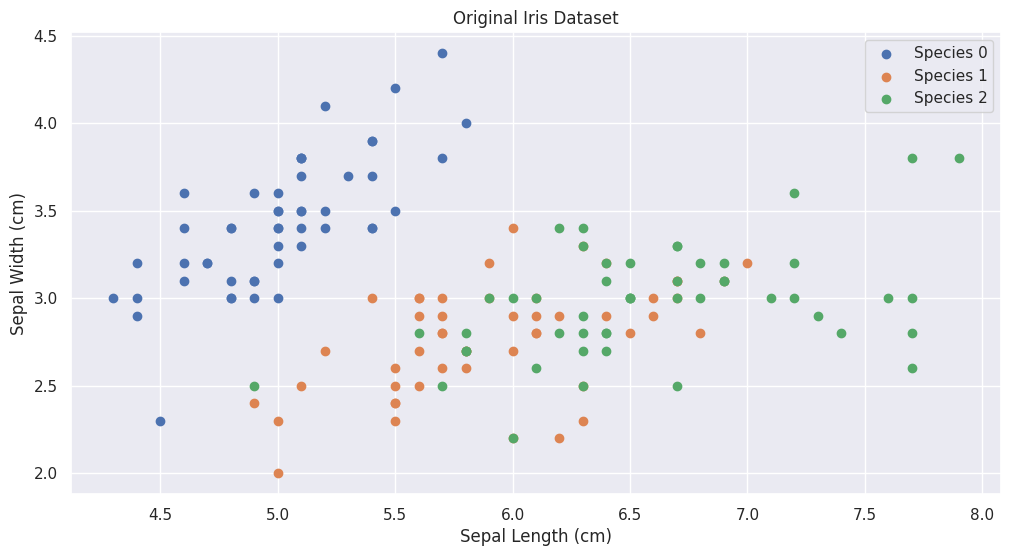

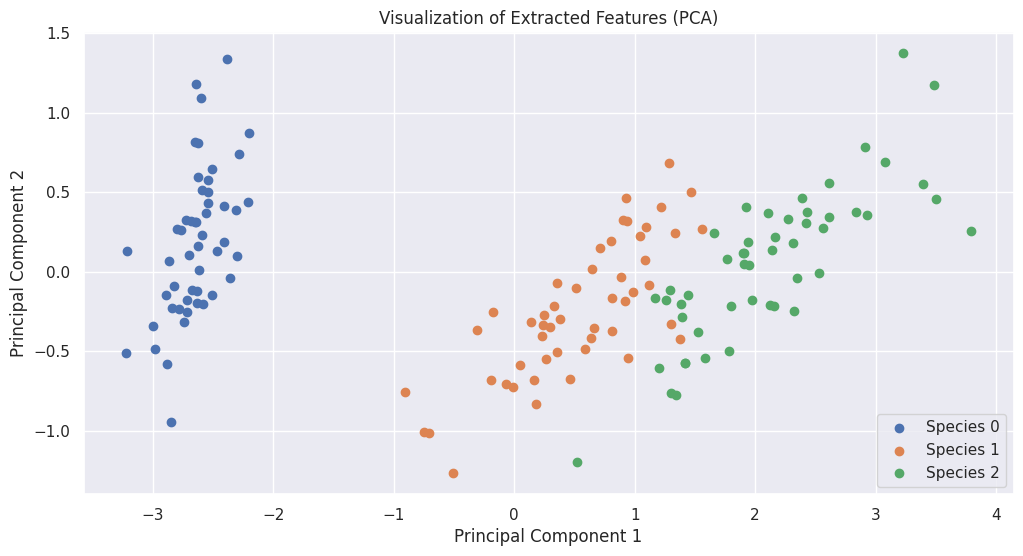

In [20]:
plt.figure(figsize=(12, 6))
for species in df_iris['species'].unique():
    subset = df_iris[df_iris['species'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], label=f'Species {species}')

plt.title('Original Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
for species in df_iris_features['species'].unique():
    subset = df_iris_features[df_iris_features['species'] == species]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Species {species}')

plt.title('Visualization of Extracted Features (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


## 4.4 Diagnosis:
Principal Component Analysis (PCA) serves as a strategic approach to address certain challenges and enhance the analysis. The need for feature extraction in this context can be diagnosed through the following considerations:

#### Dimensionality Reduction:
Issue: The original dataset contains multiple dimensions (sepal length, sepal width, petal length, petal width), making it challenging to visualize and analyze effectively.
Diagnosis: Feature extraction, exemplified by PCA, is employed to reduce the dimensionality of the dataset while preserving essential information.

#### Visual Interpretability:
Issue: Visualizing the relationships between multiple variables can be complex and may not reveal clear patterns.
Diagnosis: The scatterplots of the extracted features (Principal Components) provide a simplified and interpretable representation, aiding in the visual inspection of patterns within the dataset.

#### Enhanced Modeling:
Issue: Traditional models may struggle with the high dimensionality of the original dataset, leading to potential overfitting or reduced model interpretability.
Diagnosis: By transforming the original features into principal components, the dataset becomes more amenable to modeling, potentially improving the performance and interpretability of machine learning algorithms.

## 4.5 Damage:
#### Diminished Interpretability:
Damage: The original dataset's multidimensionality hinders the ability to interpret and understand the relationships between different floral features.
Impact: Reduced interpretability can obscure meaningful insights into the characteristics that distinguish different iris species.

#### Complex Visualization:
Damage: Visualizing the relationships among multiple variables can be intricate and may not reveal clear patterns or separations between iris species.
Impact: Complex visualizations hinder the ability to identify distinct clusters or patterns in the data, limiting the effectiveness of exploratory data analysis.

#### Modeling Inefficiencies:
Damage: Traditional models may struggle to cope with the high-dimensional nature of the original dataset, leading to potential overfitting or difficulties in model convergence.
Impact: Inefficient modeling can result in suboptimal predictive performance and challenges in extracting meaningful features that contribute to iris species differentiation.

## 4.6 Directions:
#### Dimensionality Reduction Models:

Principal Component Analysis (PCA)
PCA is a powerful technique for dimensionality reduction, which is crucial for addressing the challenge of high dimensionality in the Iris flowers dataset. It transforms the original features into uncorrelated principal components, effectively capturing the most important information while reducing the overall dimensionality.

#### Clustering Models:
K-Means Clustering
K-Means clustering can be applied after feature extraction to identify natural groupings within the dataset. By using the reduced-dimensional features obtained from PCA, K-Means can effectively cluster similar iris specimens, aiding in the exploration of inherent patterns.

#### Classification Models:
Support Vector Machines (SVM)
SVMs are robust classification models that can handle both linear and non-linear relationships. By leveraging the principal components extracted through PCA, SVMs can build effective decision boundaries, enhancing the classification accuracy for different iris species.

#### Visualization Models:
t-Distributed Stochastic Neighbor Embedding (t-SNE)
t-SNE is a powerful visualization technique that can be applied post-PCA to further enhance the interpretability of the dataset. It helps visualize the relationships between iris specimens in a reduced-dimensional space, providing a clearer depiction of the underlying patterns.

#### Ensemble Models:
Random Forest
Random Forests are ensemble models capable of handling high-dimensional data. By combining multiple decision trees, Random Forests can effectively capture complex relationships in the dataset, making them well-suited for the post-PCA feature space.

# How two Challenges from Multicollinearity and Feature Extraction can relate

Multicollinearity and feature extraction are critical challenges in statistical modeling, particularly in the context of time series analysis. This discussion explores the intricate relationships between these two challenges, examining how issues such as sample size, model specification, and data transformations impact both multicollinearity and feature extraction.
One commonality between multicollinearity and feature extraction is the susceptibility to issues arising from small sample sizes. In both cases, the power to detect meaningful patterns or relationships is compromised. For instance, a small sample size can lead to unreliable unit root testing results and unstable coefficient estimates due to multicollinearity. Expanding the sample size becomes a shared strategy that simultaneously addresses both challenges, enhancing the reliability of feature extraction and the robustness of unit root testing.
Multicollinearity and unit root testing are affected by the accurate definition of alternative hypotheses. In the case of unit root testing, different tests may have different alternative hypotheses, and the reliability of the test is contingent on accurately specifying the alternative hypothesis. Similarly, in multicollinearity testing, incorrectly defining the alternative hypothesis may result in misleading conclusions. A thoughtful consideration of the alternative hypotheses is necessary to ensure the validity of both unit root testing and multicollinearity analysis.
The presence of omitted structural breaks impacts both multicollinearity and unit root testing. In unit root testing, structural breaks can undermine the continuity and reliability of the data generation process, potentially leading to inaccurate results. Similarly, structural breaks in the correlation patterns between variables can affect the presence or severity of multicollinearity. Integrating structural breaks into the analysis becomes a shared approach to enhance the accuracy of both unit root testing and multicollinearity assessment.
The assumption of linear dependencies in both multicollinearity testing and unit root testing poses a challenge when faced with nonlinear relationships. Unit root tests, based on linear models, may yield false positives in the presence of nonlinear dependencies. Similarly, multicollinearity testing may not fully capture the underlying multicollinearity if nonlinear dependencies exist. Addressing this challenge involves acknowledging the limitations of linear models and considering alternative methodologies that can capture nonlinear relationships in both feature extraction and multicollinearity assessment.
Data transformations play a pivotal role in mitigating challenges related to both multicollinearity and unit root testing. In unit root testing, differentiating time series data can aid in identifying the existence of a unit root. Similarly, in multicollinearity testing, transforming variables (e.g., taking logarithms) can reduce multicollinearity and decrease correlation. Recognizing the importance of data transformations becomes a shared strategy in enhancing the accuracy of both unit root testing and feature extraction.
Issues such as data snooping and multiple testing impact both multicollinearity and unit root testing. When conducting multiple tests on the same set of data, the likelihood of finding false correlations or spurious features increases. Correction strategies, adjustment of significance thresholds, and considering multiple testing become essential to mitigate these issues in both feature extraction and multicollinearity analysis.
In conclusion, while multicollinearity and feature extraction are distinct challenges, their interconnections highlight the importance of a comprehensive and nuanced approach to statistical modeling. Addressing these challenges requires careful consideration of sample sizes, alternative hypotheses, structural breaks, nonlinear dependencies, data transformations, and issues related to data snooping and multiple testing. By acknowledging the commonalities and shared strategies, researchers can develop more robust and reliable models, ensuring the validity of their results in both multicollinearity and feature extraction contexts.


# How two Challenges from Joining Time Series with Different Frequencies and Feature extraction can relate

Joining time series with different frequencies and feature extraction are two challenges in time series analysis that, while distinct, share some commonalities in terms of the issues they present and potential solutions. In this discussion, we will explore how the challenges of joining time series with different frequencies and feature extraction can be related, drawing parallels to the concepts of model specifications, data transformations, and testing considerations.
Joining time series with different frequencies involves the integration of data collected at different time intervals. This challenge can arise when attempting to merge or combine time series datasets that have been measured or recorded at irregular or varying time intervals.
Feature extraction, on the other hand, pertains to transforming raw time series data into a set of relevant features that capture essential information for analysis. This process aims to reduce dimensionality while retaining important patterns and characteristics of the time series.
Both challenges may be influenced by the need for careful model specifications and appropriate data transformations. In joining time series, understanding the characteristics of each time series and deciding on the appropriate alignment or interpolation method requires thoughtful modeling choices. Similarly, feature extraction involves selecting relevant features and deciding on transformation techniques.
Both challenges may require testing considerations to ensure the reliability of results. Joining time series with different frequencies might involve testing for the compatibility of time intervals and the suitability of the chosen merging approach. Feature extraction may involve testing the significance and relevance of the selected features.
The challenges share concerns related to data snooping and multiple testing. When joining time series, multiple merging approaches or alignment methods may be considered, and the risk of finding false correlations increases. Similarly, in feature extraction, multiple features may be tested, and adjustments for significance thresholds are crucial to avoid spurious results.
Both challenges necessitate thorough model validation to ensure the reliability of the results. Proper validation in joining time series involves assessing the accuracy of the merged dataset, while in feature extraction, it involves evaluating the effectiveness of the chosen features in capturing essential information.
Feature extraction inherently involves dimensionality reduction by transforming raw time series into a concise set of features. Similarly, joining time series with different frequencies often requires aligning or resampling data to reduce the dimensionality and create a unified time structure.
In conclusion, while joining time series with different frequencies and feature extraction are distinct challenges, their resolution involves shared considerations such as careful model specifications, appropriate data transformations, testing strategies, and awareness of issues like data snooping. Addressing these challenges in a holistic manner can enhance the overall reliability and validity of time series analysis results, providing a comprehensive understanding of complex temporal data. Researchers and practitioners should approach these challenges with a thoughtful and integrated perspective, considering the specific characteristics of their datasets and the goals of their analyses.




# Bibliography:

Jung, Kenneth, and Nigam H. Shah. “Implications of Non-stationarity on Predictive Modeling Using EHRs.” Journal of Biomedical Informatics, vol. 58, Elsevier BV, Dec. 2015, pp. 168–74. Crossref, doi:10.1016/j.jbi.2015.10.006.
Unit Root Nonstationarity - MATLAB and Simulink - MathWorks India. in.mathworks.com/help/econ/unit-root-nonstationarity.html#bsf2u3f-8.
Salles, Rebecca, et al. “Nonstationary Time Series Transformation Methods: An Experimental Review.” Knowledge-Based Systems, vol. 164, Elsevier BV, Jan. 2019, pp. 274–91. Crossref, doi:10.1016/j.knosys.2018.10.041.
Ramsey, F.L., & Schafer, D.W. (2002). The statistical sleuth : a course in methods of
data analysis.
Wooldridge, J.M. (2019). Correlated random effects models with unbalanced panels.
Journal of Econometrics.
Tsay, R.S. (2005). Analysis of Financial Time Series. Technometrics, 48, 316 - 316.
Campbell, K. W. (1997). Empirical near-source attenuation relationships for horizontal
and vertical components of peak ground acceleration, peak ground velocity, and
pseudo-absolute acceleration response spectra. Seismological research letters, 68(1),
154-179.
Brooks, C. (2019). Introductory Econometrics for Finance (4th ed.). Cambridge:
Cambridge University Press. doi:10.1017/9781108524872

